<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!pip3 install pycurl

In [2]:
!curl -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 34.9M    0 15397    0     0   6412      0  1:35:20  0:00:02  1:35:18  6412
  0 34.9M    0  184k    0     0  50595      0  0:12:04  0:00:03  0:12:01 50606
  0 34.9M    0  352k    0     0  82265      0  0:07:25  0:00:04  0:07:21 82275
  4 34.9M    4 1552k    0     0   284k      0  0:02:05  0:00:05  0:02:00  312k
 11 34.9M   11 4144k    0     0   651k      0  0:00:54  0:00:06  0:00:48  844k
 18 34.9M   18 6624k    0     0   883k      0  0:00:40  0:00:07  0:00:33 1296k
 20 34.9M   20 7199k    0     0   853k      0  0:00:41  0:00:08  0:00:33 1495k
 20 34.9M   20 7248k    0     0   759k      0  0:00

In [2]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

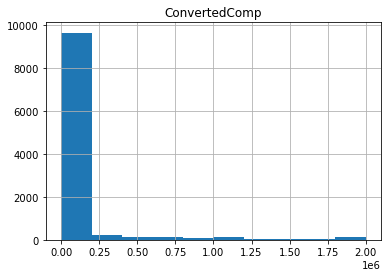

In [9]:
QUERY = """
SELECT ConvertedComp
FROM master
order by ConvertedComp
"""
hist = pd.read_sql_query(QUERY,conn)
hist.hist()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

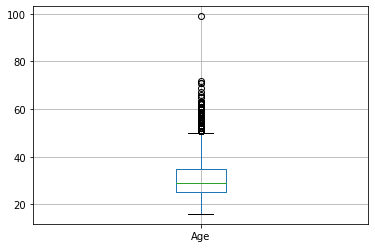

In [10]:
# your code goes here
QUERY = """
SELECT Age
FROM master
order by Age
"""
box = pd.read_sql_query(QUERY,conn)
box.boxplot(column='Age')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='Age'>

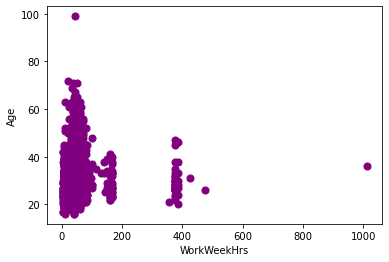

In [11]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
Scat = pd.read_sql_query(QUERY,conn)
Scat.plot.scatter(x = 'WorkWeekHrs', y = 'Age', s = 50,  c = 'purple')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

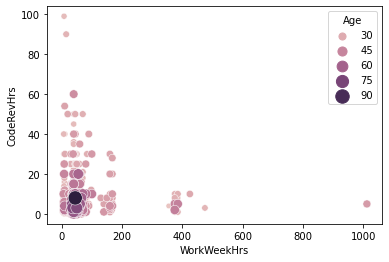

In [24]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
Order by Age
"""
bp=pd.read_sql_query(QUERY,conn)
import seaborn as sns
sns.scatterplot(
    data=bp, x="WorkWeekHrs", y="CodeRevHrs", hue="Age", size="Age",
    sizes=(20, 200))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


<AxesSubplot:ylabel='count'>

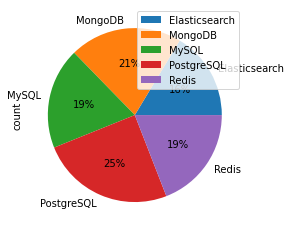

In [15]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
Group by DatabaseDesireNextYear
Order by count
"""
pie=pd.read_sql_query(QUERY,conn)
pie2=pie.nlargest(5, 'count')
pie2.groupby(['DatabaseDesireNextYear']).sum().plot(kind='pie', y='count',autopct='%1.0f%%')

In [25]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(*) as count
FROM LanguageWorkedWith
Group by LanguageWorkedWith
Order by count
"""
lan=pd.read_sql_query(QUERY,conn)
lan.head()

,LanguageWorkedWith,count
0,Erlang,98
1,WebAssembly,133
2,F#,158
3,Clojure,164
4,Elixir,187


In [30]:
QUERY="""
SELECT DatabaseWorkedWith,count(Respondent)
FROM DatabaseWorkedWith
group by Respondent having count(DatabaseWorkedWith)=1 and DatabaseWorkedWith='MySQL'
"""
df2=pd.read_sql_query(QUERY,conn)
df2

,DatabaseWorkedWith,count(Respondent)
0,MySQL,1
1,MySQL,1
2,MySQL,1
3,MySQL,1
4,MySQL,1
...,...,...
469,MySQL,1
470,MySQL,1
471,MySQL,1
472,MySQL,1


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


NameError: name 'plt' is not defined

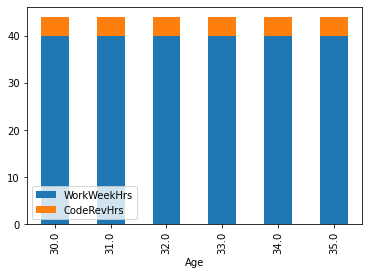

In [14]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_wk = pd.read_sql_query(QUERY,conn)

df_g=df_wk.groupby('Age').median()

df_g.plot(kind='bar',stacked=True)
plt.title('Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

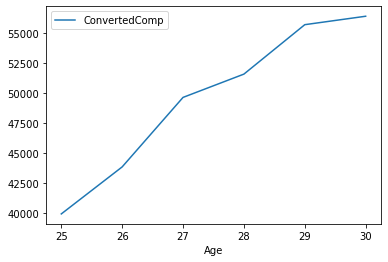

In [46]:
# your code goes here
QUERY = """
SELECT ConvertedComp,Age
FROM master
where Age BETWEEN 25 AND 30
"""
comp=pd.read_sql_query(QUERY,conn)
comp_med=comp.groupby('Age').median()
comp_med.plot(kind='line')


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5, 0, 'Respondents')

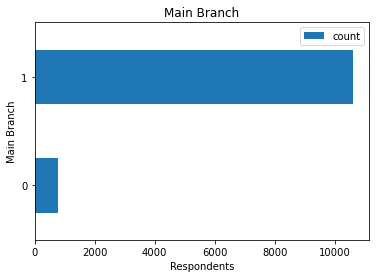

In [45]:
QUERY = """
SELECT Mainbranch, COUNT(*) as count
FROM master
Group by Mainbranch
Order by count
"""
MB=pd.read_sql_query(QUERY,conn)
from matplotlib import pyplot as plt
MB.plot(kind='barh')
plt.title("Main Branch")
plt.ylabel("Main Branch")
plt.xlabel("Respondents")

In [56]:
QUERY = """
SELECT DevType, COUNT(*) as count
FROM DevType
Group by DevType
Order by count
"""
pd.read_sql_query(QUERY,conn)

,DevType,count
0,Marketing or sales professional,61
1,Senior executive/VP,160
2,Scientist,354
3,Engineering manager,386
4,"Engineer, site reliability",449
5,"Developer, game or graphics",472
6,Product manager,480
7,Educator,514
8,Academic researcher,556
9,Student,766


Close the database connection.


In [57]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
